# Capstone Project – The Battle of Neighborhoods | Finding a Better Place in North York, Toronto

### 1. Installing and Importing Python Libraries and Dependencies

In [2]:
! pip install geocoder

In [1]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


### Data Extraction and Cleaning

In [2]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

from pandas.io.html import read_html
Toronto_table = read_html(wiki_url, attrs ={"class": "wikitable"})
print("Extracted Toronto Data")
Toronto_table[0].head(10)

Extracted Toronto Data


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [3]:
df = Toronto_table[0]
df.columns= ['Postalcode','Borough','Neighborhood']
df

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [4]:
# clean dataframe 
df = df[df.Borough!='Not assigned']
df = df[df.Borough!= 0]
df.reset_index(drop = True, inplace = True)
i = 0

# Assinging values to rows which has "Not assigned" neighborhood same as borough
for i in range(0,df.shape[0]):
    if df.iloc[i][2] == 'Not assigned':
        df.iloc[i][2] = df.iloc[i][1]
        i = i+1
        
# Grouping values based on the PostalCode                               
df = df.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.head(12)

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [5]:
df.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M5L,North York,Downsview
freq,1,24,4


In [6]:
df_geo = pd.read_csv("http://cocl.us/Geospatial_data")
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [7]:
Toronto_neigh = pd.concat([df,df_geo], axis = 1)
Toronto_neigh = Toronto_neigh.drop(columns = ['Postal Code'], axis = 0)
Toronto_neigh.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


### 3. Maps of North York

In [8]:
NY_Toronto_data = Toronto_neigh[Toronto_neigh['Borough'].str.contains("North York")].reset_index(drop = True)
NY_Toronto_data

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493
5,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493
6,M2P,North York,York Mills West,43.752758,-79.400049
7,M2R,North York,"Willowdale, Willowdale West",43.782736,-79.442259
8,M3A,North York,Parkwoods,43.753259,-79.329656
9,M3B,North York,Don Mills,43.745906,-79.352188


In [9]:
address = 'North York, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of North York, Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of North York, Toronto are 43.7543263, -79.44911696639593.


In [10]:
# create map of North York Toronto using latitude and longitude values
map_NY_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(NY_Toronto_data['Latitude'], NY_Toronto_data['Longitude'], NY_Toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY_Toronto)  
    
map_NY_Toronto

In [11]:
CLIENT_ID = 'CBVOPXBI1FPQR0KRBFZ3AJD5BOUFFISQY3HTYUWZQABVRRLF' # your Foursquare ID
CLIENT_SECRET = '4IW03XSBHGDBWEP2HWRMW4QDATIBDILZZ2PMN23ODIHXG5WG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CBVOPXBI1FPQR0KRBFZ3AJD5BOUFFISQY3HTYUWZQABVRRLF
CLIENT_SECRET:4IW03XSBHGDBWEP2HWRMW4QDATIBDILZZ2PMN23ODIHXG5WG


In [12]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
NY_Toronto_venues = getNearbyVenues(names=NY_Toronto_data['Neighborhood'],
                                   latitudes=NY_Toronto_data['Latitude'],
                                   longitudes=NY_Toronto_data['Longitude']
                                  )


Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Manor, Lawrence Heights
Glencairn
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Humberlea, Emery


In [14]:
print('There are {} Uniques Categories.'.format(len(NY_Toronto_venues['Venue Category'].unique())))
NY_Toronto_venues.groupby('Neighborhood').count().head()

There are 103 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Don Mills,25,25,25,25,25,25
Downsview,13,13,13,13,13,13


### One Hot Encoding

In [15]:
# one hot encoding
NY_Toronto_onehot = pd.get_dummies(NY_Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_Toronto_onehot['Neighborhood'] = NY_Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NY_Toronto_onehot.columns[-1]] + list(NY_Toronto_onehot.columns[:-1])
NY_Toronto_onehot = NY_Toronto_onehot[fixed_columns]
NY_Toronto_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Financial or Legal Service,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hillcrest Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Fairview, Henry Farm, Oriole",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
NY_Toronto_onehot.shape

(239, 104)

In [17]:
NY_Toronto_grouped = NY_Toronto_onehot.groupby('Neighborhood').mean().reset_index()
NY_Toronto_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Event Space,Falafel Restaurant,Fast Food Restaurant,Financial or Legal Service,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,Spa,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.095238,0.0,0.000000,0.0,0.00,0.00,0.0,0.047619,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.00,0.0,0.00,0.095238,0.000000,0.0,0.0,0.0,0.047619,0.0,0.00,0.047619,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.047619,0.0,0.047619,0.0,0.000000,0.047619,0.00,0.000000,0.0,0.0,0.047619,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.047619,0.0,0.000000,0.047619,0.047619,0.047619,0.0,0.0,0.0,0.000000,0.0,0.047619,0.0,0.047619,0.0,0.047619,0.000000,0.0,0.00,0.0,0.047619,0.0,0.047619,0.000000,0.0,0.0,0.0,0.0,0.0
1,Bayview Village,0.0,0.000000,0.000000,0.00,0.0,0.00,0.0,0.0,0.250000,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.250000,0.00,0.0,0.25,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.041667,0.00,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.041667,0.041667,0.00,0.0,0.00,0.0,0.00,0.083333,0.041667,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.041667,0.041667,0.00,0.000000,0.0,0.0,0.000000,0.041667,0.0,0.083333,0.041667,0.0,0.041667,0.041667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.041667,0.041667,0.0,0.0,0.0,0.041667,0.0,0.083333,0.0,0.083333,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.0,0.041667,0.041667,0.0,0.0,0.0,0.0,0.0
3,Don Mills,0.0,0.000000,0.000000,0.04,0.0,0.04,0.0,0.0,0.000000,0.0,0.000000,0.0,0.08,0.04,0.0,0.000000,0.0,0.0,0.0,0.04,0.0,0.000000,0.000000,0.040000,0.04,0.0,0.04,0.0,0.04,0.080000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.04,0.000000,0.040000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.12,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.040000,0.080000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.

In [18]:

num_top_venues = 5
for hood in NY_Toronto_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =NY_Toronto_grouped[NY_Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bathurst Manor, Wilson Heights, Downsview North ----
            venue  freq
0            Bank  0.10
1     Coffee Shop  0.10
2     Gas Station  0.05
3     Bridal Shop  0.05
4  Ice Cream Shop  0.05


---- Bayview Village ----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4               Lounge  0.00


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0      Sandwich Place  0.08
1  Italian Restaurant  0.08
2         Coffee Shop  0.08
3          Restaurant  0.08
4         Pizza Place  0.04


---- Don Mills ----
                 venue  freq
0                  Gym  0.12
1          Coffee Shop  0.08
2           Restaurant  0.08
3  Japanese Restaurant  0.08
4           Beer Store  0.08


---- Downsview ----
            venue  freq
0   Grocery Store  0.15
1            Park  0.15
2            Bank  0.08
3  Discount Store  0.08
4     Snack Place  0.08


---- Fairview, Hen

In [19]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NY_Toronto_grouped['Neighborhood']

for ind in np.arange(NY_Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NY_Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Gas Station,Grocery Store,Middle Eastern Restaurant,Mobile Phone Shop,Pet Store,Pharmacy,Pizza Place,Ice Cream Shop
1,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Women's Store,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping
2,"Bedford Park, Lawrence Manor East",Restaurant,Sandwich Place,Italian Restaurant,Coffee Shop,Juice Bar,Café,Butcher,Fast Food Restaurant,Japanese Restaurant,Pharmacy
3,Don Mills,Gym,Restaurant,Japanese Restaurant,Coffee Shop,Beer Store,Discount Store,Chinese Restaurant,Caribbean Restaurant,Café,Bus Line
4,Downsview,Park,Grocery Store,Food Truck,Gym / Fitness Center,Discount Store,Liquor Store,Business Service,Snack Place,Baseball Field,Bank


### K-means Clustering Approach

In [21]:
# set number of clusters
kclusters = 10

Toronto_grouped_clustering = NY_Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([1, 8, 1, 1, 1, 1, 5, 7, 4, 3, 1, 0, 9, 2, 1, 1, 1, 6])

In [22]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_.astype(int))

NY_Toronto_merged = NY_Toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NY_Toronto_merged = NY_Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
NY_Toronto_merged= NY_Toronto_merged.dropna()

In [24]:
NY_Toronto_merged.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,7,Golf Course,Mediterranean Restaurant,Pool,Dog Run,Women's Store,Department Store,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,1,Clothing Store,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Restaurant,Chocolate Shop,Bank,Bakery,Juice Bar,Shoe Store
2,M2K,North York,Bayview Village,43.786947,-79.385975,8,Café,Bank,Chinese Restaurant,Japanese Restaurant,Women's Store,Diner,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping
5,M2N,North York,"Willowdale, Willowdale East",43.770120,-79.408493,1,Ramen Restaurant,Café,Restaurant,Sandwich Place,Sushi Restaurant,Coffee Shop,Pizza Place,Pet Store,Grocery Store,Plaza
6,M2P,North York,York Mills West,43.752758,-79.400049,6,Park,Convenience Store,Furniture / Home Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop


### Maps of Cluster

In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_Toronto_merged['Latitude'], NY_Toronto_merged['Longitude'], NY_Toronto_merged['Neighborhood'], NY_Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster - 1],
        fill=True,
        fill_color=rainbow[cluster - 1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [26]:
df1=NY_Toronto_merged.loc[NY_Toronto_merged['Cluster Labels'] == 0 ,NY_Toronto_merged.columns[[2] + list(range(5, NY_Toronto_merged.shape[1]))]]
df2=NY_Toronto_merged.loc[NY_Toronto_merged['Cluster Labels'] == 1 ,NY_Toronto_merged.columns[[2] + list(range(5, NY_Toronto_merged.shape[1]))]]
df3=NY_Toronto_merged.loc[NY_Toronto_merged['Cluster Labels'] == 2 ,NY_Toronto_merged.columns[[2] + list(range(5, NY_Toronto_merged.shape[1]))]]

In [32]:
NY_Toronto_Avg_HousingPrice=pd.DataFrame({"Neighborhood":Toronto_neigh["Neighborhood"] , 
                                           "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0                                                                                                           
                                                                                                     ]})
NY_Toronto_Avg_HousingPrice

,Neighborhood,Average_Housing_Price
0,"Malvern, Rouge",335000.0
1,"Rouge Hill, Port Union, Highland Creek",286600.0
2,"Guildwood, Morningside, West Hill",175000.0
3,Woburn,225900.0
4,Cedarbrae,219400.0
5,Scarborough Village,573900.0
6,"Kennedy Park, Ionview, East Birchmount Park",225000.0
7,"Golden Mile, Clairlea, Oakridge",370500.0
8,"Cliffside, Cliffcrest, Scarborough Village West",370500.0
9,"Birch Cliff, Cliffside West",433500.0


In [33]:
NY_Toronto_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

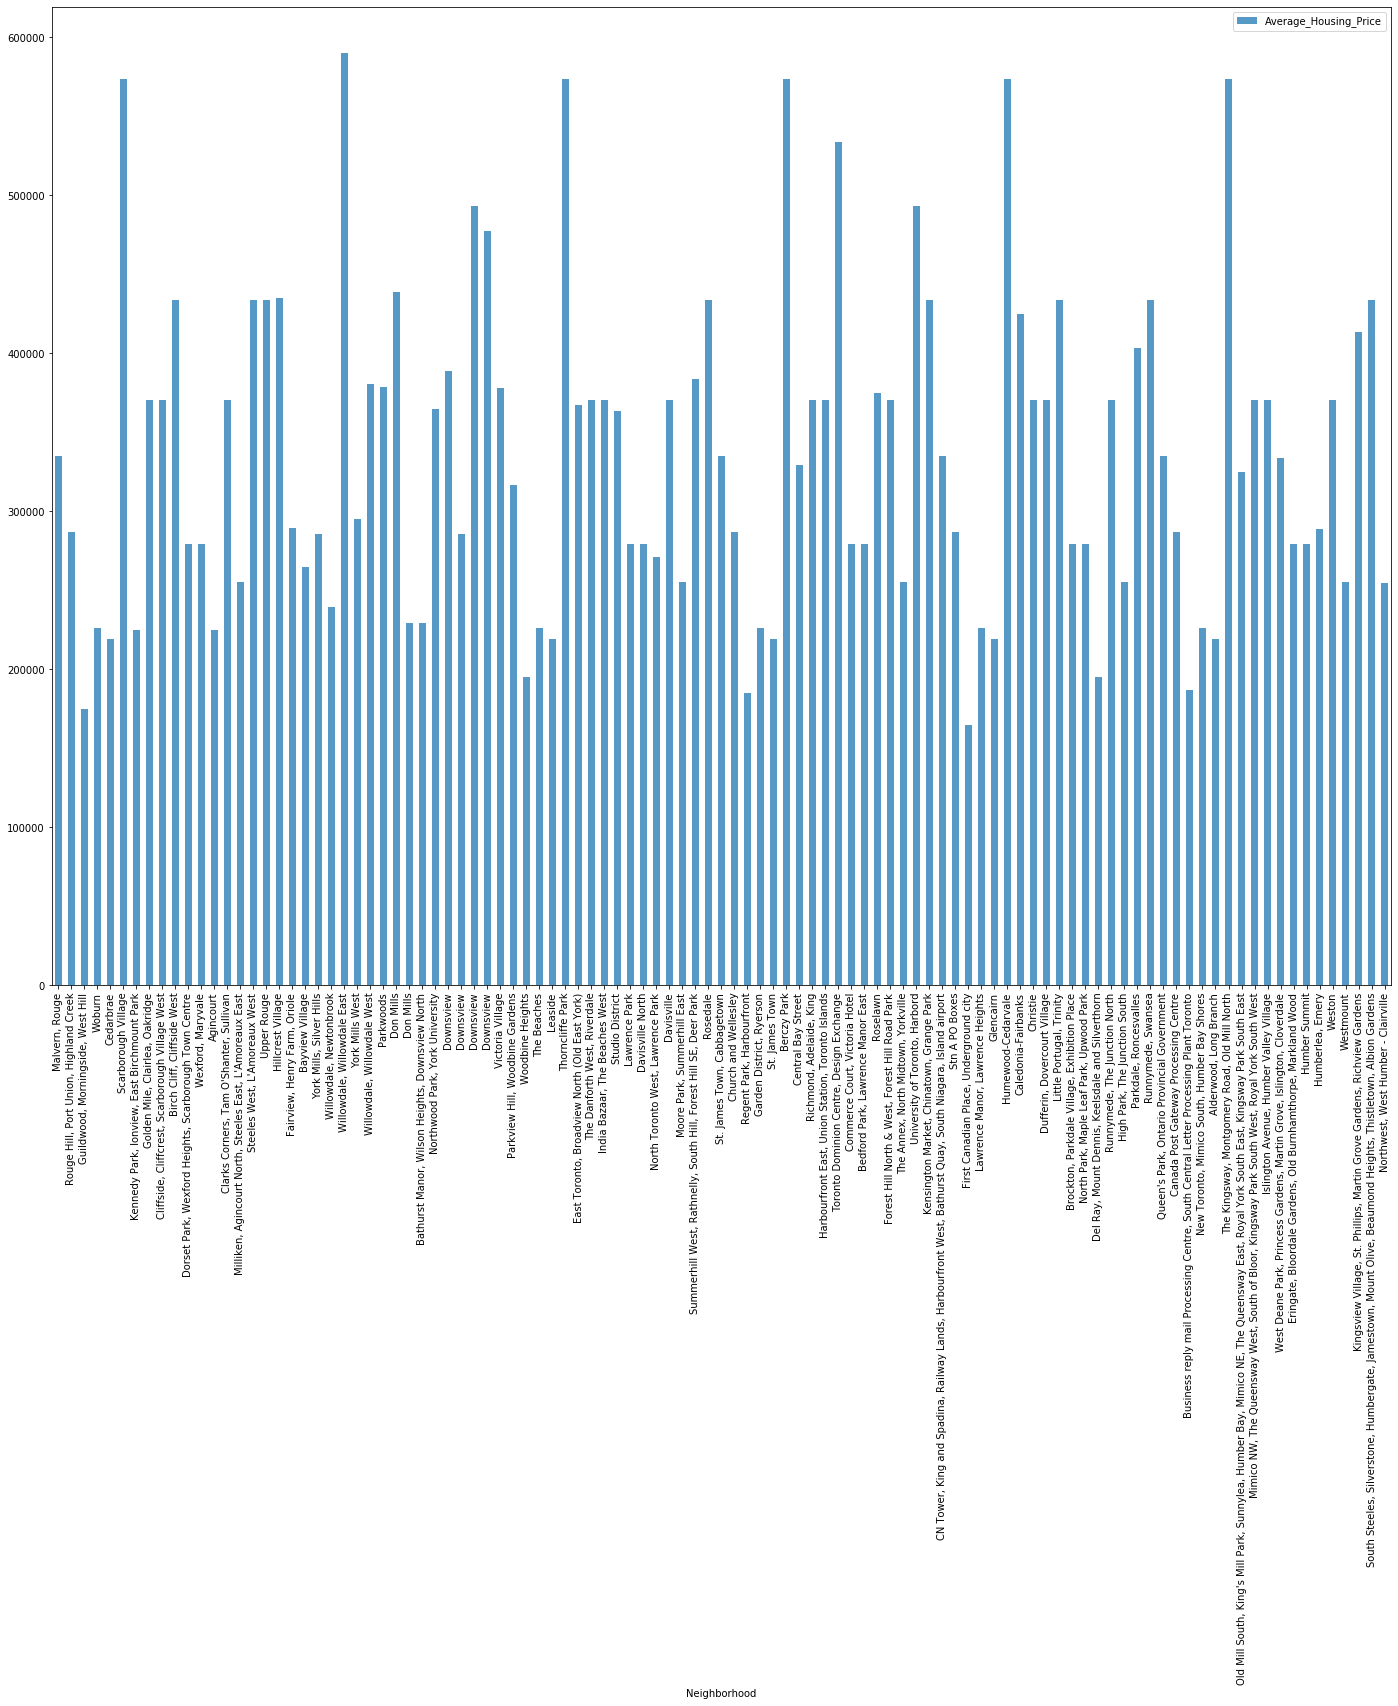

In [34]:
NY_Toronto_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

### School rating by clusters

In [35]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [36]:

new_NY_Toronto=NY_Toronto_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
NY_Toronto_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [37]:
NY_Toronto_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

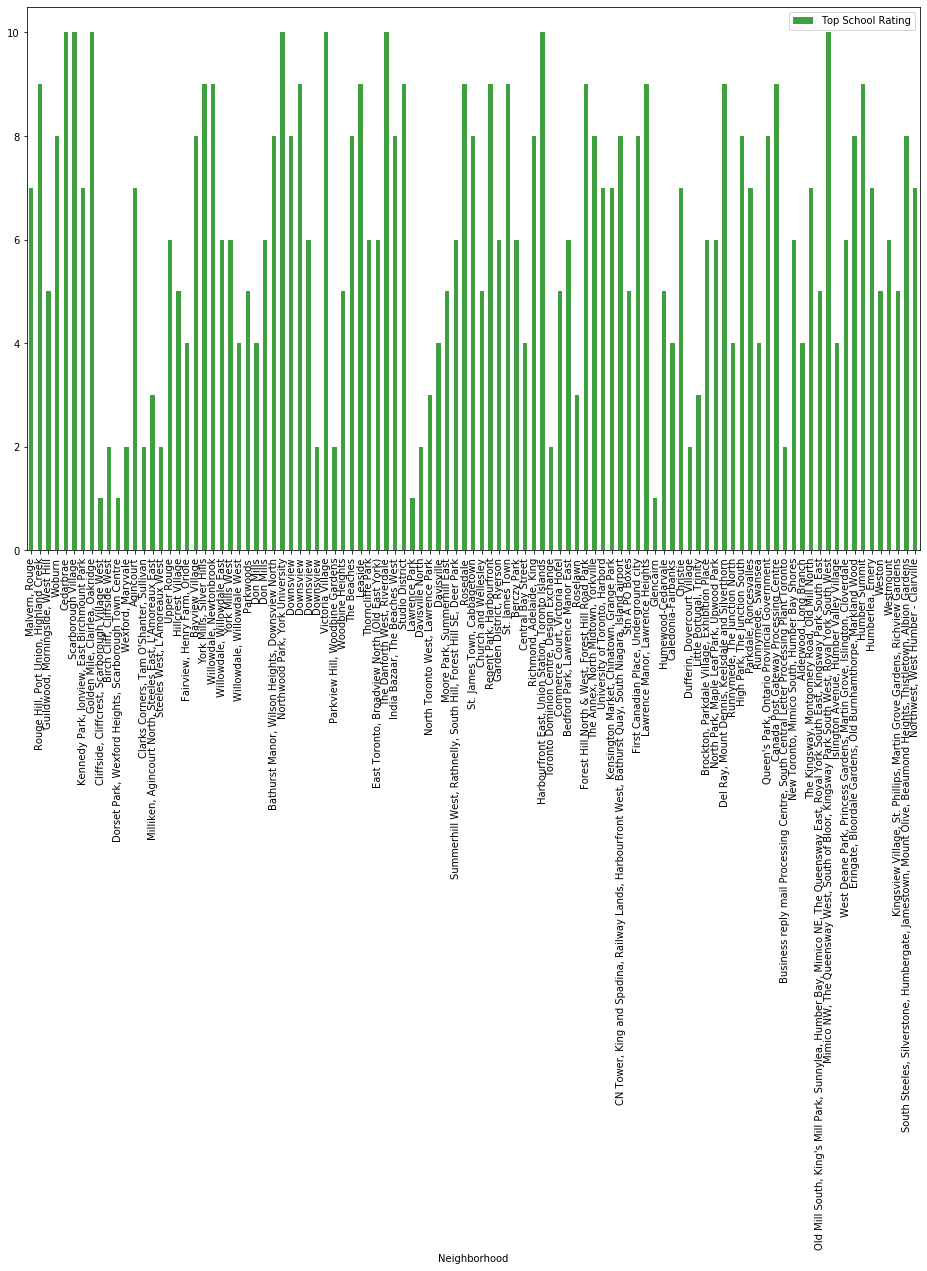

In [38]:
NY_Toronto_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);

#### Conclusion: In this project, using k-means cluster algorithm I separated the neighborhood into 10(Ten) different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made